# Лабораторная работа №4, Грызин Алексей РТ5-61Б

## Линейные модели, SVM и деревья решений.

- #### Цель лабораторной работы: изучение линейных моделей, SVM и деревьев решений.


### Задание:

1.  Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2.  В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3.  С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4.  Обучите следующие модели:
    - одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
    - SVM;
    - дерево решений.
5.  Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6.  Постройте график, показывающий важность признаков в дереве решений.
7.  Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.


### Импорт необходимых библиотек и загрузка набора данных


In [774]:
from io import StringIO 
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.svm import LinearSVR, NuSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text, export_graphviz
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import pydotplus

df = pd.read_csv("data/Admission_Predict.csv")


### Анализ датасета


#### The parameters included are :

- GRE Scores ( out of 340 )
- TOEFL Scores ( out of 120 )
- University Rating ( out of 5 )
- Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
- Undergraduate GPA ( out of 10 )
- Research Experience ( either 0 or 1 )
- Chance of Admit ( ranging from 0 to 1 )


In [28]:
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
df.describe()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [31]:
df.isnull().sum()


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

> Как видно, пропуски отсутствуют, а значит нет необходимости в удалении колонок или строк.


#### Диаграмма Jointplot


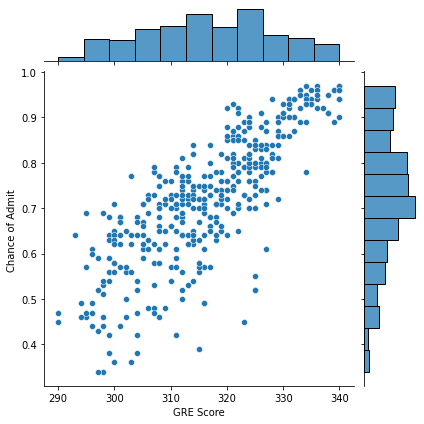

In [11]:
sns.jointplot(x="GRE Score", y="Chance of Admit ", data=df)


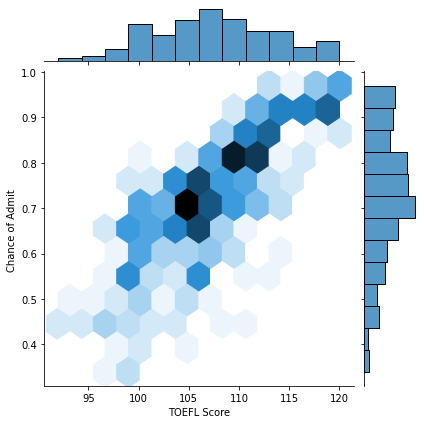

In [48]:
sns.jointplot(x="TOEFL Score", y="Chance of Admit ", data=df, kind="hex")


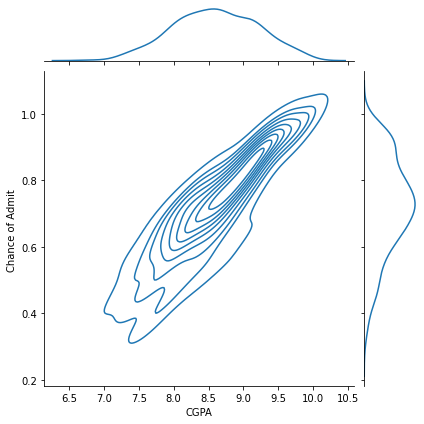

In [49]:
sns.jointplot(x="CGPA", y="Chance of Admit ", data=df, kind="kde")


### Корреляционный анализ


- В данном датасете целевым признаком является параметр "Chance of Admit". Рассмотрим, как остальные параметры с ним коррелируют.


<AxesSubplot:>

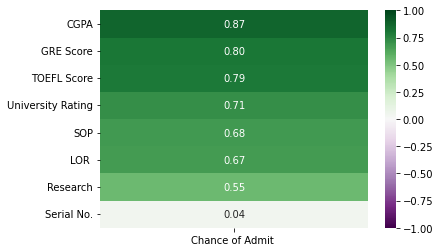

In [38]:
chance_of_admit = pd.DataFrame(df.corr()["Chance of Admit "].sort_values(ascending=False)[1:])

sns.heatmap(chance_of_admit, annot=True, fmt=".2f", cmap=plt.cm.PRGn, vmin=-1, vmax=1)


In [32]:
df.corr()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


<AxesSubplot:>

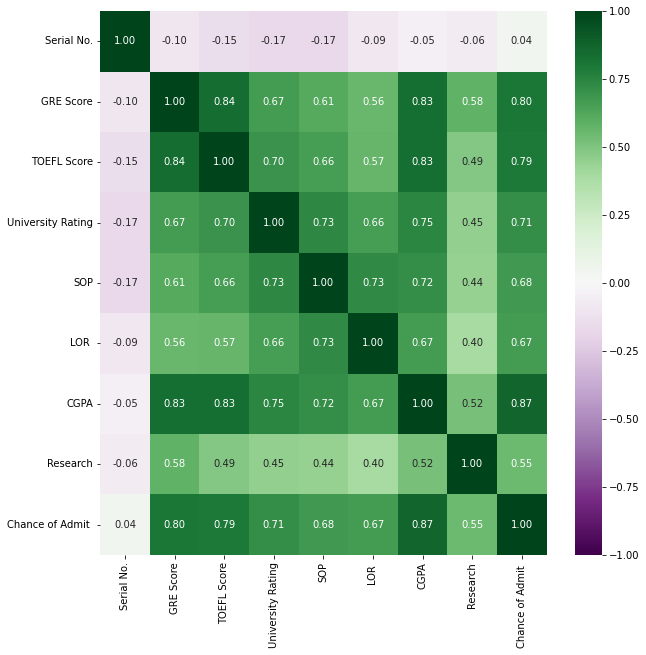

In [36]:
fig, ax = plt.subplots(1, 1, sharex="col", sharey="row", figsize=(10, 10))

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap=plt.cm.PRGn, vmin=-1, vmax=1)


Выше представлены матрица корреляций признаков между собой, а также матрица корреляции для целевого признака. Из этих матриц можно сделать следующие выводы:

- Значение параметра "Serial No" никак не коррелирует со всеми остальными параметрами. В дальнейшем этот столбец можно будет опустить.
- Целевой признак достаточно неплохо коррелирует (положительно) со всеми параметрами. Очень высокая положительная корреляция наблюдается с "CGPA", "GRE Score", "TOEFL Score".
- Также высокая корреляция наблюдается между парами этих параметров, а значит во избежании мультиколлинеарности необходимо выбрать один из этих признаков. Логичнее всего оставить "CGPA", т.к. с ним у целевого признака наблюдается наибольшая связь.


> В результате корреляционного анализа было принято решение в моделях машинного обучения для прогноза целевого признака использовать параметры: "CGPA", "University Rating", "SOP", "LOR" и "Research".



### Очистка выбросов


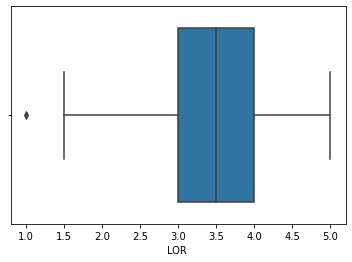

In [64]:
sns.boxplot(x=df["CGPA"])
plt.show()


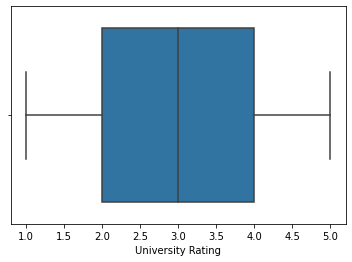

In [5]:
sns.boxplot(x=df["University Rating"])
plt.show()


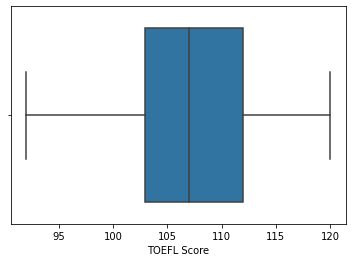

In [48]:
sns.boxplot(x=df["SOP"])
plt.show()


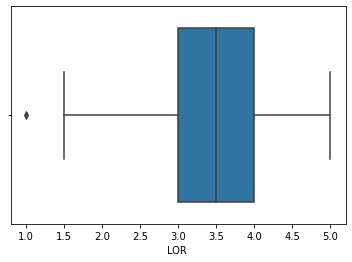

In [65]:
sns.boxplot(x=df["LOR "])
plt.show()


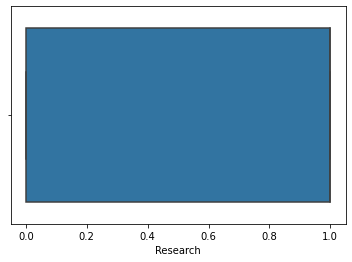

In [66]:
sns.boxplot(x=df["Research"])
plt.show()


Как видно из графиков, выброс наблюдается в столбцах "CGPA" и "LOR".


In [3]:
# Очистка столбца CGPA с помощью межквартильного размаха.
Q1, Q3 = df["CGPA"].quantile([0.25, 0.75])
IQR = Q3 - Q1
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

df_no_outliers = df[(df["CGPA"] > min_limit) & (df["CGPA"] < max_limit)]
df_no_outliers.shape


(399, 9)

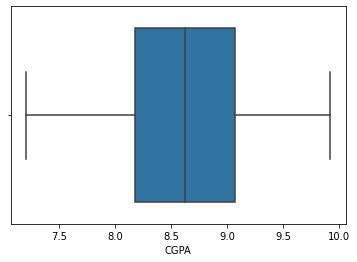

In [4]:
sns.boxplot(x=df_no_outliers["CGPA"])
plt.show()


In [68]:
# Очистка столбца LOR
Q1, Q3 = df["LOR "].quantile([0.25, 0.75])
IQR = Q3 - Q1
min_limit = Q1 - 1.5 * IQR
max_limit = Q3 + 1.5 * IQR

df_no_outliers = df_no_outliers[(df_no_outliers["LOR "] > min_limit) & (df_no_outliers["LOR "] < max_limit)]
df_no_outliers.shape


(391, 9)

In [69]:
# Сравнение количества строк до очистки и после
print(f"Cтрок до очистки от выбросов: {df.shape[0]};\nПослe очистки: {df_no_outliers.shape[0]}.")


Cтрок до очистки от выбросов: 400;
Послe очистки: 391.


### Удаление лишних столбцов и масштабирование данных


In [497]:
# Удаление лишних колонок
df_corr = df_no_outliers.drop(columns=["Serial No.", "GRE Score", "TOEFL Score"])
df_corr.head()


,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,4,4.5,4.5,9.65,1,0.92
1,4,4.0,4.5,8.87,1,0.76
2,3,3.0,3.5,8.00,1,0.72
3,3,3.5,2.5,8.67,1,0.80
4,2,2.0,3.0,8.21,0,0.65


In [498]:
# Масштабирование
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X=df_corr.drop(columns=["Chance of Admit "]), y=df_corr["Chance of Admit "])

# Вставка отмасштабированных данных
df_scaled = pd.DataFrame(scaled_features, columns=df_corr.columns[:-1])
df_scaled.head()


,University Rating,SOP,LOR,CGPA,Research
0,0.75,0.875,0.833333,0.900735,1.0
1,0.75,0.750,0.833333,0.613971,1.0
2,0.50,0.500,0.500000,0.294118,1.0
3,0.50,0.625,0.166667,0.540441,1.0
4,0.25,0.250,0.333333,0.371324,0.0


### Разбиение выборки на обучающую и тестовую


In [499]:
x = df_scaled
y = df_corr["Chance of Admit "]

x_train: pd.DataFrame
x_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=8)


In [500]:
# Размер обучающей выборки
x_train.shape, y_train.shape


((312, 5), (312,))

In [501]:
# Размер тестовой выборки
x_test.shape, y_test.shape


((79, 5), (79,))

### Функция для оценки качества моделей


In [502]:
def model_scoring(y_true, y_pred):
    print("MAE: {};".format(mean_absolute_error(y_true, y_pred)))
    print("MSE: {};".format(mean_squared_error(y_true, y_pred)))
    print("R2: {}.".format(r2_score(y_true, y_pred)))


### Линейные модели


- #### Линейная регрессия


In [503]:
# Обучение модели линейной регресии (метод наименьших квадратов)
linear_regressor = LinearRegression()
linear_regressor.fit(x_train, y_train)


LinearRegression()

In [504]:
# Предсказания модели линейной регрессии на тестовой выборке
lr_pred = linear_regressor.predict(x_test)


In [505]:
# Оценка качества модели
model_scoring(y_test, lr_pred)


MAE: 0.054739394440012294;
MSE: 0.005732336071901842;
R2: 0.7034326760333958.


- #### Гребневая регрессия


In [506]:
# Значения коэффициента альфа
alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]


In [507]:
%%time
# Обучение модели гребневой регресии с оптимизацией гиперпараметров
ridge_regressor = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_absolute_error')
ridge_regressor.fit(x_train, y_train)

CPU times: user 120 ms, sys: 5.6 ms, total: 126 ms
Wall time: 123 ms


RidgeCV(alphas=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
        cv=10, scoring='neg_mean_absolute_error')

In [508]:
# Значение коэффициента альфа
ridge_regressor.alpha_


0.1

In [509]:
# Лучшее значение метрики
-ridge_regressor.best_score_


0.04609100187451156

In [510]:
# Предсказания модели гребневой регрессии на тестовой выборке
rr_pred = ridge_regressor.predict(x_test)


In [511]:
# Оценка качества модели
model_scoring(y_test, rr_pred)


MAE: 0.05461970071838883;
MSE: 0.005706249234401397;
R2: 0.7047823009491749.


- #### Lasso-регрессия


In [512]:
%%time
# Обучение модели lasso-регресии с оптимизацией гиперпараметров
lasso_regressor = LassoCV(cv=10)
lasso_regressor.fit(x_train, y_train)

CPU times: user 44.1 ms, sys: 2.39 ms, total: 46.5 ms
Wall time: 45 ms


LassoCV(cv=10)

In [513]:
# Значение коэффициента альфа
lasso_regressor.alpha_


0.0003368240251138766

In [514]:
# Предсказания модели lasso-регресии на тестовой выборке
lsr_pred = lasso_regressor.predict(x_test)


In [515]:
# Оценка качества модели
model_scoring(y_test, lsr_pred)


MAE: 0.054562063052520295;
MSE: 0.0057112757169643005;
R2: 0.7045222515619884.


- #### Elastic net


In [516]:
%%time
# Обучение модели elastic net с оптимизацией гиперпараметров
elastic_net_regressor = ElasticNetCV(alphas=alphas, cv=10)
elastic_net_regressor.fit(x_train, y_train)

CPU times: user 24.4 ms, sys: 6.01 ms, total: 30.5 ms
Wall time: 30.7 ms


ElasticNetCV(alphas=[0.001, 0.01, 0.1, 1, 10, 100, 1000], cv=10)

In [517]:
# Значение альфа
elastic_net_regressor.alpha_


0.001

In [518]:
# Значение L1 Ratio
elastic_net_regressor.l1_ratio_


0.5

In [519]:
# Предсказания модели elastic net на тестовой выборке
en_pred = elastic_net_regressor.predict(x_test)


In [520]:
# Оценка качества модели
model_scoring(y_test, en_pred)


MAE: 0.054312479691495344;
MSE: 0.005663853599848062;
R2: 0.7069756754704245.


- #### Полиномиальная регрессия


In [733]:
# Гиперпараметры для оптимизации
params_to_tune = {
    "polynomialfeatures__degree": np.arange(2, 6, 1, dtype=int),
    "linearregression__fit_intercept": [True, False],
}


In [734]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))


In [735]:
%%time
# Оптимизация гиперпараметров
pr_gs = GridSearchCV(PolynomialRegression(), params_to_tune, cv=10,
                     scoring='neg_mean_absolute_error')
pr_gs.fit(x_train, y_train)

CPU times: user 2.47 s, sys: 754 ms, total: 3.23 s
Wall time: 1.44 s


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'polynomialfeatures__degree': array([2, 3, 4, 5])},
             scoring='neg_mean_absolute_error')

In [736]:
# Лучшее значение параметров
pr_gs.best_params_


{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 2}

In [737]:
# Лучшее значение метрики
-pr_gs.best_score_


0.04740946765779262

In [738]:
# Обучение модели
polynomial_regressor = pr_gs.best_estimator_
polynomial_regressor.fit(x_train, y_train)


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [739]:
# Предсказания модели полиномиальной регресии на тестовой выборке
pr_pred = polynomial_regressor.predict(x_test)


In [740]:
# Оценка качества модели
model_scoring(y_test, pr_pred)


MAE: 0.051366731677022825;
MSE: 0.0054650864837270255;
R2: 0.7172590627284603.


> Среди линейных моделей результаты у всех получились неплохие и близкие друг к другу, но лучший показала полиномиальная регрессия.


### Метод опорных векторов (SVM)


In [741]:
# Гиперпараметры для оптимизации
params_to_tune = {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 1e4, 1e6]}


In [742]:
%%time
# Оптимизация гиперпараметров
lsvr_gs = GridSearchCV(LinearSVR(max_iter=10000), params_to_tune, cv=4, scoring='r2')
lsvr_gs.fit(x_train, y_train)

/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of

CPU times: user 1.86 s, sys: 12.3 ms, total: 1.88 s
Wall time: 1.87 s


/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/feelsbadmans/Univer/bmstu-6-sem-tmo/.venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=4, estimator=LinearSVR(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0,
                               10000.0, 1000000.0]},
             scoring='r2')

In [743]:
# Лучшее значение параметров
lsvr_gs.best_params_


{'C': 1.0}

In [744]:
# Лучшее значение метрики
-lsvr_gs.best_score_


-0.7811043802751636

In [745]:
# Обучение модели
linear_svr = lsvr_gs.best_estimator_
linear_svr.fit(x_train, y_train)


LinearSVR(max_iter=10000)

In [746]:
# Предсказания модели линейной регресии на SVM на тестовой выборке
lsvr_pred = linear_svr.predict(x_test)


In [747]:
# Оценка качества модели
model_scoring(y_test, lsvr_pred)


MAE: 0.05360656659671273;
MSE: 0.005794983952531583;
R2: 0.7001915341886928.


### Дерево решений


In [758]:
# Гиперпараметры для оптимизации
parameters_to_tune = {
    "max_depth": np.arange(2, 9, 1, dtype=int),
    "min_samples_leaf": np.linspace(0.01, 0.1, 10),
    "max_features": [0.2, 0.4, 0.6, 0.8, "auto", "sqrt", "log2"],
}

In [759]:
%%time
# Оптимизация гиперпараметров
dtr_gs = GridSearchCV(DecisionTreeRegressor(criterion='absolute_error', random_state=8),
                      parameters_to_tune, cv=4, scoring='neg_mean_absolute_error')
dtr_gs.fit(x_train, y_train)

CPU times: user 5.57 s, sys: 29.4 ms, total: 5.6 s
Wall time: 5.6 s


GridSearchCV(cv=4,
             estimator=DecisionTreeRegressor(criterion='absolute_error',
                                             random_state=8),
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8]),
                         'max_features': [0.2, 0.4, 0.6, 0.8, 'auto', 'sqrt',
                                          'log2'],
                         'min_samples_leaf': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])},
             scoring='neg_mean_absolute_error')

In [760]:
# Лучшее значение параметров
dtr_gs.best_params_

{'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 0.01}

In [761]:
# Лучшее значение метрики
-dtr_gs.best_score_

0.04956730769230769

In [762]:
# Обучение модели
dt_regressor = dtr_gs.best_estimator_
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      max_features='auto', min_samples_leaf=0.01,
                      random_state=8)

In [763]:
# Предсказания модели регрессора на основе дерева решений
dt_pred = dt_regressor.predict(x_test)

In [764]:
# Оценка качества модели
model_scoring(y_test, dt_pred)

MAE: 0.05955696202531645;
MSE: 0.007630063291139239;
R2: 0.6052521304463161.


In [766]:
# Визуализация дерева с помощью текста
tree_rules = export_text(dt_regressor, feature_names=list(x_train.columns))
print(tree_rules)

|--- CGPA <= 0.60
|   |--- CGPA <= 0.30
|   |   |--- CGPA <= 0.17
|   |   |   |--- CGPA <= 0.16
|   |   |   |   |--- LOR  <= 0.08
|   |   |   |   |   |--- SOP <= 0.19
|   |   |   |   |   |   |--- value: [0.47]
|   |   |   |   |   |--- SOP >  0.19
|   |   |   |   |   |   |--- value: [0.45]
|   |   |   |   |--- LOR  >  0.08
|   |   |   |   |   |--- value: [0.53]
|   |   |   |--- CGPA >  0.16
|   |   |   |   |--- value: [0.39]
|   |   |--- CGPA >  0.17
|   |   |   |--- SOP <= 0.31
|   |   |   |   |--- University Rating <= 0.12
|   |   |   |   |   |--- value: [0.58]
|   |   |   |   |--- University Rating >  0.12
|   |   |   |   |   |--- CGPA <= 0.24
|   |   |   |   |   |   |--- value: [0.52]
|   |   |   |   |   |--- CGPA >  0.24
|   |   |   |   |   |   |--- value: [0.56]
|   |   |   |--- SOP >  0.31
|   |   |   |   |--- LOR  <= 0.42
|   |   |   |   |   |--- CGPA <= 0.28
|   |   |   |   |   |   |--- value: [0.63]
|   |   |   |   |   |--- CGPA >  0.28
|   |   |   |   |   |   |--- value: [0.6

In [772]:
# Визуализация дерева
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

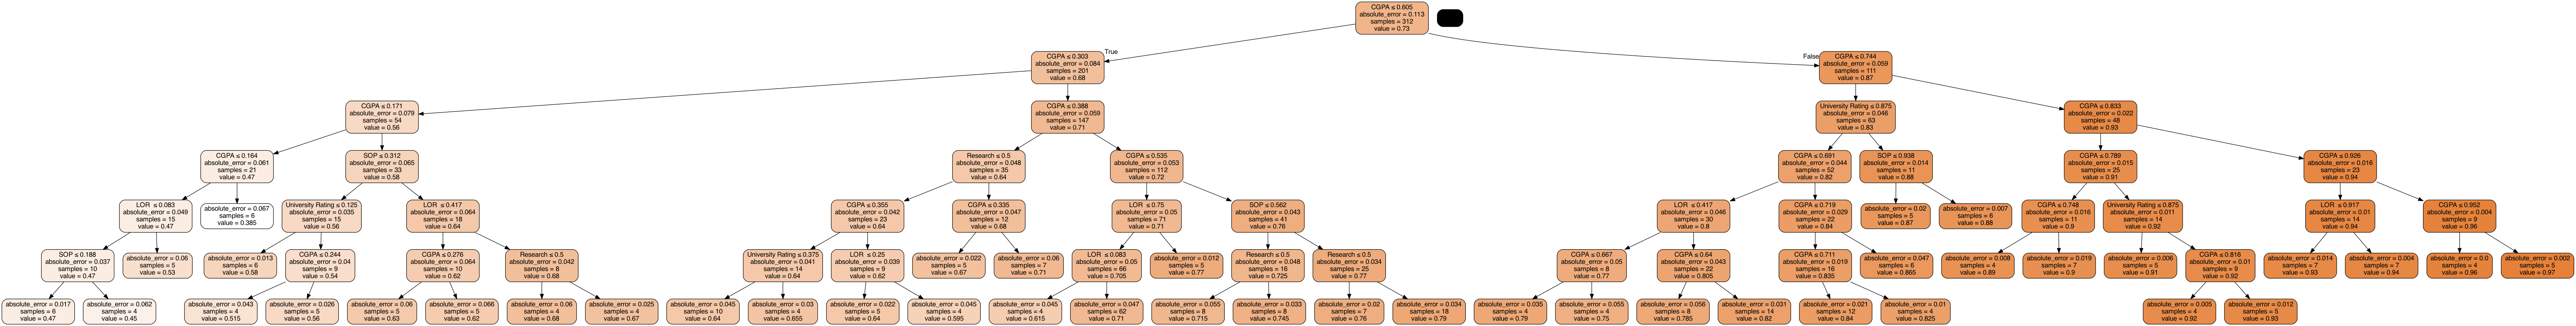

In [776]:
Image(get_png_tree(dt_regressor, x_train.columns), height='100%')